# Análisis de Distribución de Caracteres en BERT

### Configuración Inicial
Importamos las librerías necesarias. Nota que usaremos `string` para obtener listas rápidas de todos los números (0-9) y letras (a-z).

In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Cargar el Tokenizador
Cargamos el modelo base de BERT (versión en minúsculas).

In [2]:
# load BERT tokenizer
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Ejercicio 1: Conteo de Caracteres en los Tokens

Queremos saber qué letras y números son los más "famosos" dentro del vocabulario de BERT.
El vocabulario tiene ~30,000 tokens. Algunos son palabras completas ("house"), otros son fragmentos ("##ing").

La lógica aquí es:
1.  Definir nuestra lista de búsqueda (dígitos 0-9 y letras a-z).
2.  Recorrer cada carácter.
3.  Buscar en **todo** el vocabulario cuántos tokens contienen ese carácter.
4.  **Importante:** Excluir los tokens de reserva llamados `[unused]`, ya que ensuciarían la estadística.

In [3]:
# Definimos dígitos y letras usando la librería string
digits = string.digits
letters = string.ascii_lowercase

# set of digits and letters
digitsLetters = digits + letters

# initialize results vector (del tamaño de la cantidad de caracteres a buscar)
charCount = np.zeros(len(digitsLetters))

# count the appearances (excluding "unused")
for i,c in enumerate(digitsLetters):
  # Sumamos 1 por cada token 't' en el vocabulario SI contiene el caracter 'c' Y NO contiene la palabra 'unused'
  charCount[i] = np.sum([ 1 for t in tokenizer.vocab.keys() if c in t and 'unused' not in t ])

### Ejercicio 2: Reporte de Resultados

Ahora que tenemos los conteos, vamos a ordenarlos de mayor a menor frecuencia para ver cuáles son los caracteres más comunes en el inglés que aprendió BERT.

Usamos `np.argsort` para obtener los índices ordenados y `[::-1]` para invertir el orden (descendente).

In [4]:
# Report the sorted characters (orden descendente)
charOrder = np.argsort(charCount)[::-1]

for i in charOrder:
  print(f'"{digitsLetters[i]}" appears in {int(charCount[i])} tokens.')

"e" appears in 14633 tokens.
"a" appears in 12381 tokens.
"i" appears in 11614 tokens.
"r" appears in 10991 tokens.
"n" appears in 10735 tokens.
"s" appears in 10206 tokens.
"t" appears in 9702 tokens.
"o" appears in 8961 tokens.
"l" appears in 7553 tokens.
"d" appears in 6328 tokens.
"c" appears in 6326 tokens.
"u" appears in 4989 tokens.
"g" appears in 4447 tokens.
"m" appears in 4445 tokens.
"p" appears in 4005 tokens.
"h" appears in 3983 tokens.
"b" appears in 2874 tokens.
"y" appears in 2782 tokens.
"f" appears in 2051 tokens.
"v" appears in 1982 tokens.
"k" appears in 1750 tokens.
"w" appears in 1583 tokens.
"1" appears in 627 tokens.
"z" appears in 501 tokens.
"x" appears in 498 tokens.
"j" appears in 474 tokens.
"2" appears in 310 tokens.
"0" appears in 306 tokens.
"q" appears in 275 tokens.
"8" appears in 259 tokens.
"9" appears in 254 tokens.
"7" appears in 251 tokens.
"3" appears in 236 tokens.
"6" appears in 230 tokens.
"5" appears in 224 tokens.
"4" appears in 215 tokens.


### Visualización (Opcional)
Un gráfico de barras simple para visualizar la distribución que acabamos de calcular.

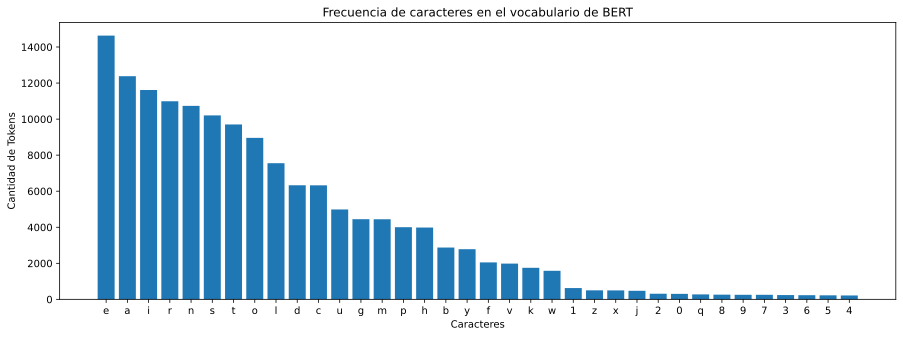

In [5]:
plt.figure(figsize=(15,5))
plt.bar(range(len(charCount)), charCount[charOrder])
plt.xticks(range(len(charCount)), [digitsLetters[i] for i in charOrder])
plt.xlabel('Caracteres')
plt.ylabel('Cantidad de Tokens')
plt.title('Frecuencia de caracteres en el vocabulario de BERT')
plt.show()

# Interpretación del Gráfico de Barras

Este gráfico nos cuenta la historia de **cómo está construido el vocabulario de BERT**. No todas las letras son iguales para la IA; algunas son "VIPs" y otras son ciudadanos de segunda clase.

### 1. ¿Qué representan los Ejes?
* **Eje X (Horizontal):** Muestra los caracteres (letras y números), pero **ordenados por popularidad** de izquierda a derecha. Los más usados están primero.
* **Eje Y (Vertical):** Indica la **cantidad de tokens** únicos en los que aparece ese carácter.

### 2. Los Protagonistas (Barras Altas a la Izquierda)
Las barras más altas corresponden a los caracteres que forman la estructura del idioma inglés.
* Probablemente la barra más alta sea la **"e"**.
* Le siguen vocales como **"a", "i", "o"** y consonantes muy frecuentes como **"r", "n", "s", "t"**.
* **Significado:** BERT tiene miles de tokens dedicados a estas letras porque son necesarias para formar la inmensa mayoría de las palabras.

### 3. La "Cola Larga" (Barras Bajas a la Derecha)
A la derecha del gráfico, las barras descienden drásticamente.
* Aquí encontramos las letras "raras" del inglés como **"z", "q", "x", "j"**.
* También suelen aparecer aquí los **dígitos (0-9)**. Aunque los números se usan mucho, no forman tantas combinaciones complejas (prefijos/sufijos) como las letras, por lo que ocupan menos espacio en el diccionario.

### Conclusión
Este gráfico demuestra que el tokenizador de BERT no es aleatorio. Es un **espejo estadístico del idioma inglés**. El modelo es eficiente porque dedica más recursos a lo que más se repite.